In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LassoCV,Lasso
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,recall_score
%matplotlib inline

In [2]:
df = pd.read_csv('bank-full.csv',sep=';')
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [3]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [4]:
from pandas_profiling import ProfileReport

In [5]:
ProfileReport(df)

In [6]:
plt.rcParams['figure.figsize'] = (10,7)

In [7]:
df.head(2)

age         job  marital  education default  balance housing loan  contact  \
0   58  management  married   tertiary      no     2143     yes   no  unknown   
1   44  technician   single  secondary      no       29     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome   y  
0    5   may       261         1     -1         0  unknown  no  
1    5   may       151         1     -1         0  unknown  no

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
cols = ['job', 'education', 'housing','loan']
#
# Encode labels of multiple columns at once
#
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df.head()

age  job  marital  education default  balance  housing  loan  contact  day  \
0   58    4  married          2      no     2143        1     0  unknown    5   
1   44    9   single          1      no       29        1     0  unknown    5   
2   33    2  married          1      no        2        1     1  unknown    5   
3   47    1  married          3      no     1506        1     0  unknown    5   
4   33   11   single          3      no        1        0     0  unknown    5   

  month  duration  campaign  pdays  previous poutcome   y  
0   may       261         1     -1         0  unknown  no  
1   may       151         1     -1         0  unknown  no  
2   may        76         1     -1         0  unknown  no  
3   may        92         1     -1         0  unknown  no  
4   may       198         1     -1         0  unknown  no

In [10]:
df['marital'] = df['marital'].astype('category')
df['marital'] = df['marital'].cat.codes

df['default'] = df['default'].astype('category')
df['default'] = df['default'].cat.codes

df["contact"] = df["contact"].astype('category')
df["contact"] = df["contact"].cat.codes

df["month"] = df["month"].astype('category')
df["month"] = df["month"].cat.codes

df["poutcome"] = df["poutcome"].astype('category')
df["poutcome"] = df["poutcome"].cat.codes

df["y"] = df["y"].astype('category')
df["y"] = df["y"].cat.codes

In [11]:
df.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       151         1     -1         0         3  0  
2    5      8        76         1     -1         0         3  0  
3    5      8        92         1     -1         0         3  0  
4    5      8       198         1     -1         0         3  0

<AxesSubplot:xlabel='job', ylabel='count'>

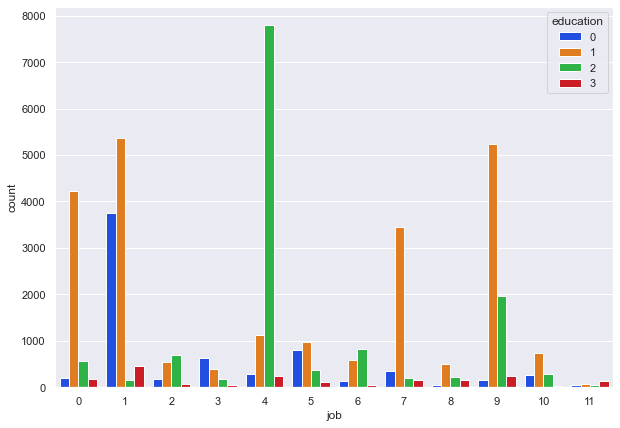

In [12]:
sns.set_theme(style="darkgrid", palette='bright')
sns.countplot(x = 'job',hue='education', data=df)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='housing', ylabel='count'>

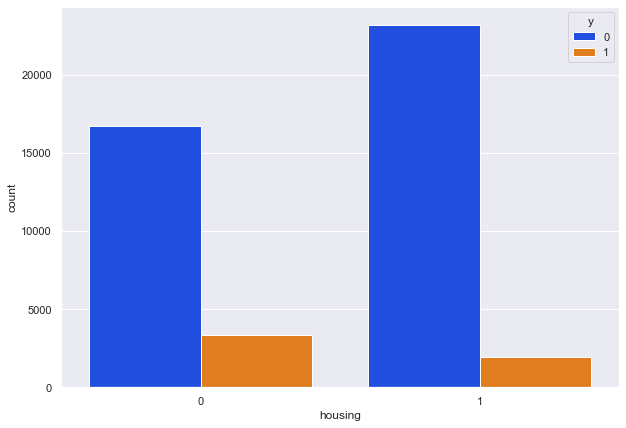

In [13]:
sns.countplot('housing', hue='y', data=df)

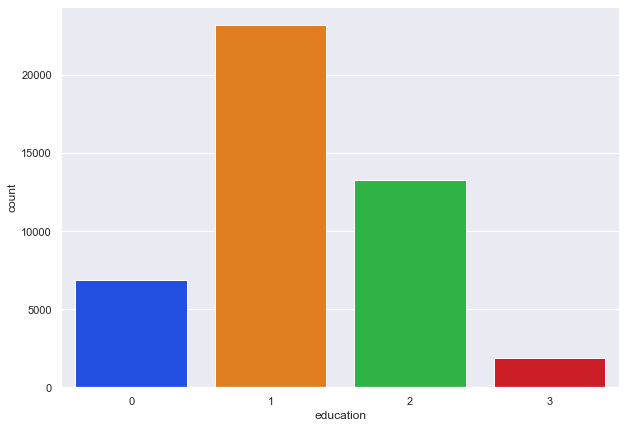

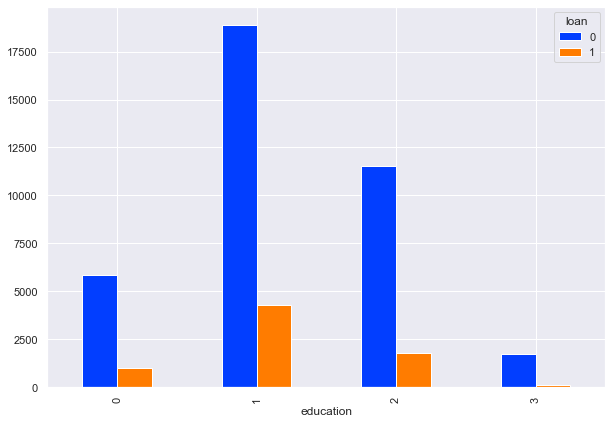

In [14]:
sns.countplot(x='education', data=df)
pd.crosstab(df.education, df.loan).plot(kind='bar')
plt.show()

In [15]:
x = df.iloc[:,:16]
y = df['y']

**1.FINDING MULTICOLLINEARITY**

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

VIF   Features
0   12.473925        age
1    2.835715        job
2    4.712237    marital
3    3.741265  education
4    1.030059    default
5    1.239142    balance
6    2.546168    housing
7    1.207661       loan
8    1.981193    contact
9    4.606491        day
10   5.241605      month
11   2.004525   duration
12   1.891432   campaign
13   3.135542      pdays
14   1.384589   previous
15  18.161716   poutcome

- As the 'age' and 'poutcome' columns are having high VIF value, we will drop them.

In [17]:
df1 = df.copy()

In [18]:
df = df1.drop(columns=['age','poutcome'], axis =1,  inplace= True)

In [19]:
df1.head()

job  marital  education  default  balance  housing  loan  contact  day  \
0    4        1          2        0     2143        1     0        2    5   
1    9        2          1        0       29        1     0        2    5   
2    2        1          1        0        2        1     1        2    5   
3    1        1          3        0     1506        1     0        2    5   
4   11        2          3        0        1        0     0        2    5   

   month  duration  campaign  pdays  previous  y  
0      8       261         1     -1         0  0  
1      8       151         1     -1         0  0  
2      8        76         1     -1         0  0  
3      8        92         1     -1         0  0  
4      8       198         1     -1         0  0

In [20]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df1.drop(columns='y'))
scaled_df = pd.DataFrame(scaled_df, columns=['job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous'])
data = scaled_df.merge(y.rename('target'), left_index=True, right_index=True)

In [21]:
data

job   marital  education  default   balance   housing      loan  \
0     -0.103820 -0.275762   1.036362 -0.13549  0.256419  0.893915 -0.436803   
1      1.424008  1.368372  -0.300556 -0.13549 -0.437895  0.893915 -0.436803   
2     -0.714951 -0.275762  -0.300556 -0.13549 -0.446762  0.893915  2.289359   
3     -1.020516 -0.275762   2.373280 -0.13549  0.047205  0.893915 -0.436803   
4      2.035139  1.368372   2.373280 -0.13549 -0.447091 -1.118674 -0.436803   
...         ...       ...        ...      ...       ...       ...       ...   
45206  1.424008 -0.275762   1.036362 -0.13549 -0.176460 -1.118674 -0.436803   
45207  0.201746 -1.919895  -1.637474 -0.13549  0.120447 -1.118674 -0.436803   
45208  0.201746 -0.275762  -0.300556 -0.13549  1.429593 -1.118674 -0.436803   
45209 -1.020516 -0.275762  -0.300556 -0.13549 -0.228024 -1.118674 -0.436803   
45210 -0.714951 -0.275762  -0.300556 -0.13549  0.528364 -1.118674 -0.436803   

        contact       day     month  duration  campaign     pdays  previous  \
0      1.514306 -1.298476  0.823773  0.011016 -0.569351 -0.411453 -0.251940   
1      1.514306 -1.298476  0.823773 -0.416127 -0.569351 -0.411453 -0.251940   
2      1.514306 -1.298476  0.823773 -0.707361 -0.569351 -0.411453 -0.251940   
3      1.514306 -1.298476  0.823773 -0.645231 -0.569351 -0.411453 -0.251940   
4      1.514306 -1.298476  0.823773 -0.233620 -0.569351 -0.411453 -0.251940   
...         ...       ...       ...       ...       ...       ...       ...   
45206 -0.713012  0.143418  1.156344  2.791329  0.076230 -0.411453 -0.251940   
45207 -0.713012  0.143418  1.156344  0.768224 -0.246560 -0.411453 -0.251940   
45208 -0.713012  0.143418  1.156344  3.373797  0.721811  1.436189  1.050473   
45209  0.400647  0.143418  1.156344  0.970146  0.399020 -0.411453 -0.251940   
45210 -0.713012  0.143418  1.156344  0.399328 -0.246560  1.476138  4.523577   

       target  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
45206       1  
45207       1  
45208       1  
45209       0  
45210       0  

[45211 rows x 15 columns]

<AxesSubplot:>

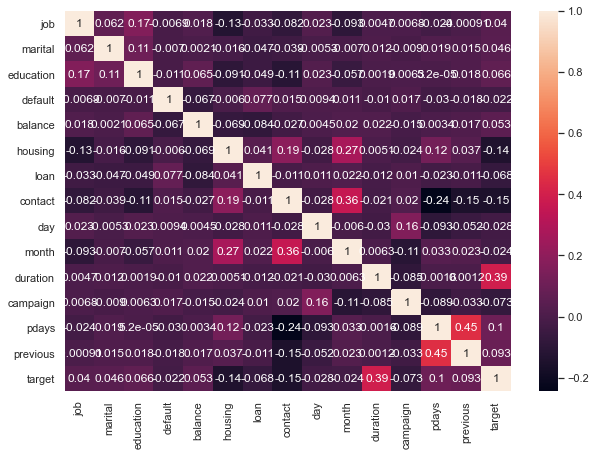

In [22]:
corr = data.corr()
sns.heatmap(corr, annot=True)

In [23]:
data.shape

(45211, 15)

## Model Building

In [25]:
X= data.iloc[:,0:14]
Y= data.iloc[:,-1]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(36168, 14)
(9043, 14)
(36168,)
(9043,)


In [26]:
log_model = LogisticRegression()
log_model.fit(X_train,Y_train)

LogisticRegression()

In [31]:
log_pred = log_model.predict(X_test)

print(log_pred)
print('The accuracy score is: ', accuracy_score(Y_test,log_pred))

[0 0 0 ... 0 0 0]
The accuracy score is:  0.8915183014486343


In [32]:
confusion_matrix(Y_test,log_pred)

array([[7841,  153],
       [ 828,  221]], dtype=int64)